** Brian Blaylock **
** January 16, 2019 **

# HRRR values for GLM Flashes

- What is the model conditions at each flash location?
- How does that value compare to the typical (OSG Climatology) conditions?

In [1]:
import xarray
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, pluck_hrrr_point, get_hrrr_variable
from BB_maps.my_basemap import draw_centermap, draw_HRRR_map
from BB_cmap.NWS_standard_cmap import *
from BB_cmap.reflectivity_cmap import reflect_ncdc
from BB_datetimes.range import range_dates
from BB_GOES.get_GLM import get_GLM_file_nearesttime

In [2]:
m = draw_HRRR_map()

In [3]:
DATE = datetime(2018, 8, 4)

In [4]:
bounding_box = []

In [5]:
# Load a HRRR file
H = get_hrrr_variable(DATE, 'UVGRD:10 m')
Hltng = get_hrrr_variable(DATE, 'LTNG:entire')
Hrefc = get_hrrr_variable(DATE, 'REFC:entire')


 >> Dowloading tempfile: ./temp_hrrr_2018080400_f00_UVG.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180804/hrrr.t00z.wrfsfcf00.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180804/hrrr.t00z.wrfsfcf00.grib2.idx
 >> Matched a variable:  71:40906242:d=2018080400:UGRD:10 m above ground:anl:
 >> Byte Range: 40906242 42991845
 >> Converting winds to earth-relative
  Run Date: 2018-08-04 00:00 UTC F00
Valid Date: 2018-08-04 00:00 UTC

 >> Dowloading tempfile: ./temp_hrrr_2018080400_f00_LTN.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180804/hrrr.t00z.wrfsfcf00.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180804/hrrr.t00z.wrfsfcf00.grib2.idx
 >> Matched a variable:  54:25648127:d=2018080400:LTNG:entire atmosphere:anl:
 >> Byte Range: 25648127 25648314
  Run Date: 2018-08-04 00:00 UTC F00
Valid Date: 2018-08-04 0

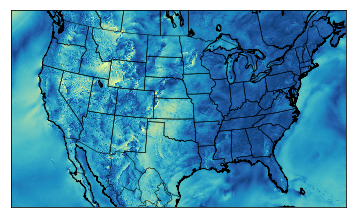

In [6]:
c = cm_wind()
m.pcolormesh(H['lon'], H['lat'], H['SPEED'], cmap=c['cmap'], vmax=c['vmax'], vmin=c['vmin'], latlon=True)
m.drawstates()
m.drawcountries()
m.drawcoastlines()

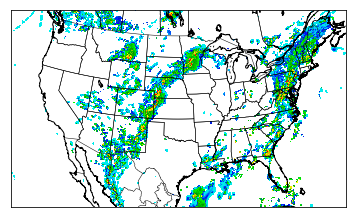

In [7]:
c = reflect_ncdc()
#Hrefc['value'] = np.ma.array(Hrefc['value'], mask=Hrefc['value']==-10)
m.pcolormesh(H['lon'], H['lat'], Hrefc['value'], cmap=c['cmap'], vmax=c['vmax'], vmin=c['vmin'], latlon=True)
m.drawstates()
m.drawcountries()
m.drawcoastlines()

In [2]:
GLM_FILES = get_GLM_file_nearesttime(datetime(2018, 8, 4), window=60)

Looking in these file paths for th nearest datetime
/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20180803/23/
/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20180804/00/
/uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20180804/01/
       requested: 2018-08-04 00:00:00
nearest GLM file: 2018-08-04 00:00:00
        GLM file: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20180804/00/OR_GLM-L2-LCFA_G16_s20182160000000_e20182160000200_c20182160000227.nc
window = 60 (+/- 20.0 minutes)
returning 121 files


In [3]:
# Open all the files for the ABI scan
dd = {}
for i, file in enumerate(GLM_FILES):
    dd[i] = xarray.open_dataset(file)

In [4]:
# Concatenate all the files for variables I want along the dimension "number_of_flashes"
flash_lon = xarray.concat([dd[i].flash_lon for i in dd.keys()], dim='number_of_flashes')
flash_lat = xarray.concat([dd[i].flash_lat for i in dd.keys()], dim='number_of_flashes')
flash_area = xarray.concat([dd[i].flash_area for i in dd.keys()], dim='number_of_flashes')
flash_id = xarray.concat([dd[i].flash_id for i in dd.keys()], dim='number_of_flashes')
flash_energy = xarray.concat([dd[i].flash_energy for i in dd.keys()], dim='number_of_flashes')
flash_quality_flag = xarray.concat([dd[i].flash_quality_flag for i in dd.keys()], dim='number_of_flashes')

flash_time_offset_of_first_event = xarray.concat([dd[i].flash_time_offset_of_first_event for i in dd.keys()], dim='number_of_flashes')
flash_time_offset_of_last_event = xarray.concat([dd[i].flash_time_offset_of_last_event for i in dd.keys()], dim='number_of_flashes')

group_parent_flash_id = xarray.concat([dd[i].group_parent_flash_id for i in dd.keys()], dim='number_of_groups')

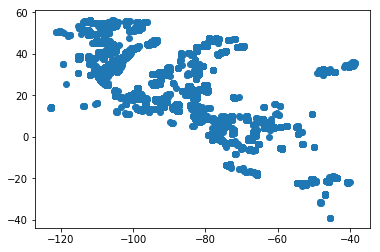

In [5]:
plt.scatter(flash_lon, flash_lat)